In [2]:
import numpy as np
import random
import pandas as pd;
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt



,height,sex,avhepa,foodq
0,1.679597,1.0,-0.116766,7.054041
1,1.750353,0.0,-0.009020,6.841710
2,1.617287,0.0,0.088100,0.616035
3,1.784192,1.0,-0.022020,1.638762
4,1.508820,0.0,-0.133698,0.163309


## Residuals - fitted values - real values
A little simulation exercise to gain a better understanding of the relationship of residuals, fitted values and real values

First I simulate a dataframe of height / sex / average height of parents (as diff from mean) / quality of food they consume (based on some imaginary scale)

In [ ]:
n = 100
data = np.empty((n,4))

for i in range(n):
    data[i,1] = random.randint(0, 1)
    data[i,2] = random.gauss(0, 0.1)
    data[i,3] = random.uniform(0,10)
    data[i,0] = random.uniform(0.95,1.05)*(1.6 + 0.1*data[i,1]+data[i,2]+0.02*data[i,3])

df = pd.DataFrame(data, columns=['height', 'sex', 'avhepa','foodq'])
df.head()

Then I fit a least squares model on all three predictors for height. And print the summary and the anova results

In [52]:
predictors = df.columns.drop(['height'])
formul = ' + '.join(predictors)

est2 = smf.ols(f'height ~ {formul}', data=df).fit()

print(est2.summary())

table = sm.stats.anova_lm(est2) 
print(table)

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     204.4
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           1.51e-41
Time:                        10:49:29   Log-Likelihood:                 154.46
No. Observations:                 100   AIC:                            -300.9
Df Residuals:                      96   BIC:                            -290.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5955      0.012    130.346      0.0

But then I discover a little error: Why do the t ** 2 and the f values not equal (except foodq)? Because I did not add typ=2 (or 3). Therefore it performed a sequential 
anova test instead of a partial one. When we add typ=2, we can see that t**2 = f for all predictors

In [45]:
print(est2.summary())

table = sm.stats.anova_lm(est2, typ=2) 
print(table)

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     43.48
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           7.77e-18
Time:                        10:34:01   Log-Likelihood:                 93.700
No. Observations:                 100   AIC:                            -179.4
Df Residuals:                      96   BIC:                            -169.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5988      0.025     65.174      0.0

Then I draw a graph that shows the relationship of the squared values (for each datapoint) of "Fitted Value - mean", "Residual",  "Real value - mean"
- Fitted Values and Real Values show a clear linear relationship, which is to be expected fitted Values are a direct approximation of the real values. The better the model fits, the more this scatter plot equals a 45 degree line
- Residuals do not seem to have a relationship with the other two, which is also to be expected as the noise from the simulated data is evenly spread thanks to the uniform spread of the height itself

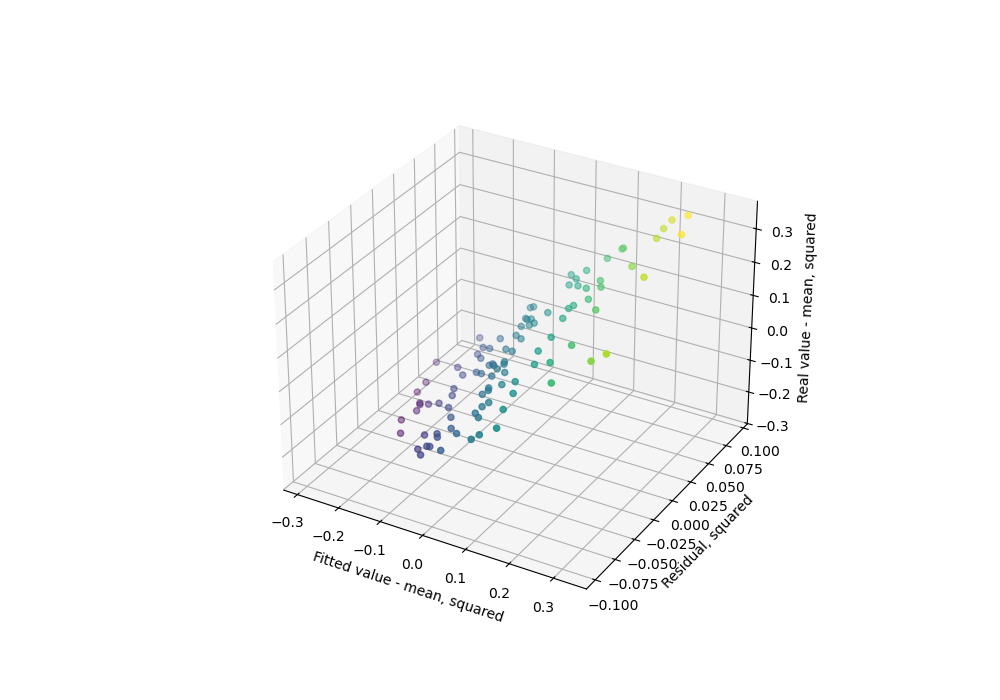

In [53]:
%matplotlib widget
mean = np.mean(df['height'])

fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(111, projection='3d')
ax.scatter((est2.fittedvalues-mean), est2.resid, (df['height'] - mean),c=(df['height'] - mean), cmap='viridis')
ax.set_xlabel('Fitted value - mean, squared')
ax.set_ylabel('Residual, squared')
ax.set_zlabel('Real value - mean, squared')
plt.show();

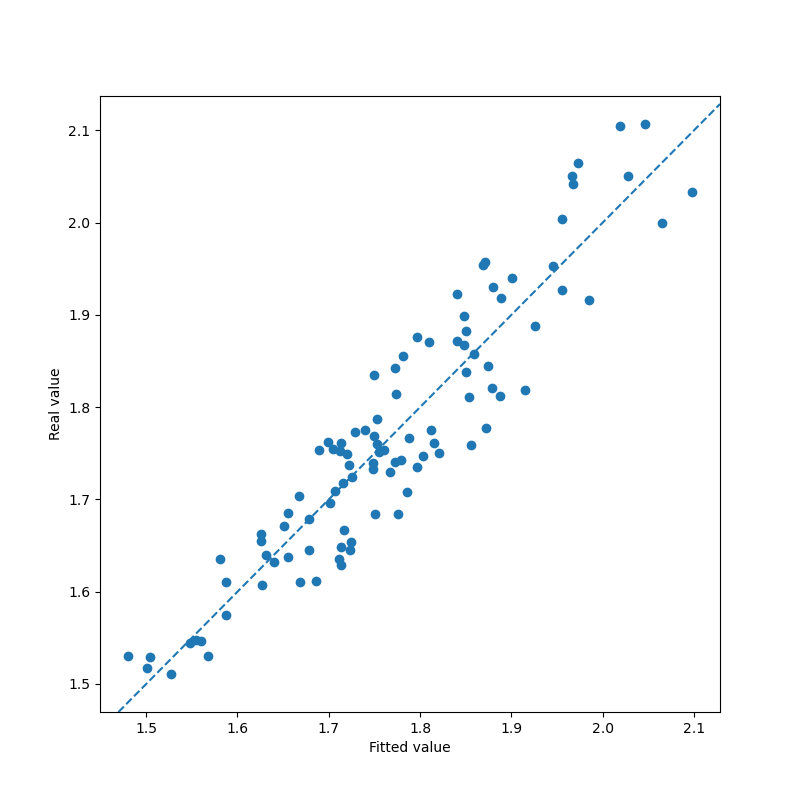

In [54]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(est2.fittedvalues, df['height'])
ax.set_xlabel('Fitted value')
ax.set_ylabel('Real value')
ax.axline((1.5,1.5),(2.0,2.0), ls='--');

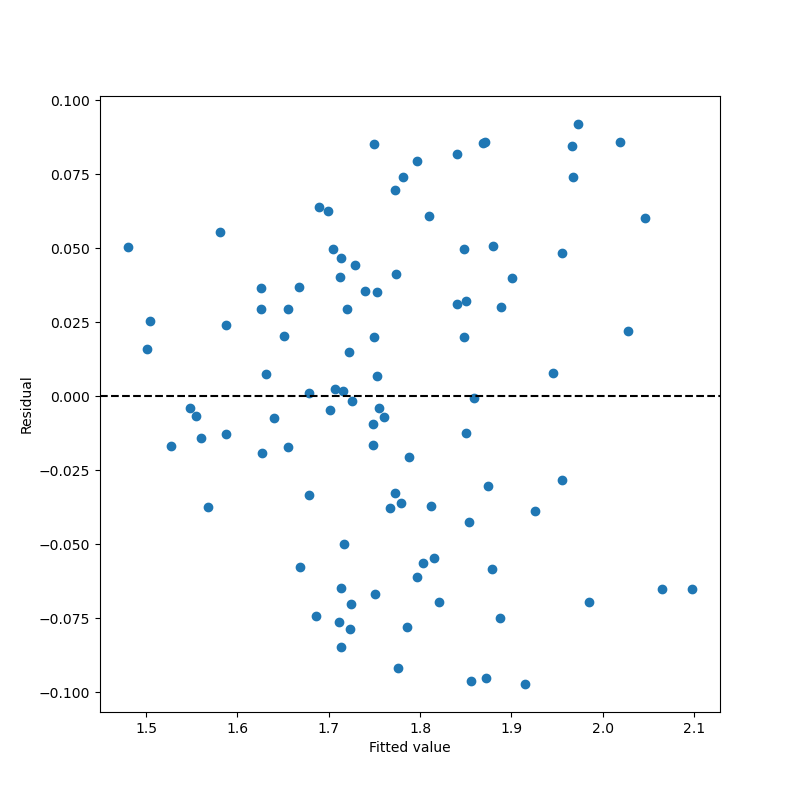

In [55]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(est2.fittedvalues, est2.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

In the end I draw a scatter matrix, which simply visualizes the relationships of the simulated data: Foodquality has the weakest relationship with height, but both the categorical variable average height of parents and the gender are stronger predictors. ( which is also mirrored in the estimates for the coefficients from above)


          height       sex    avhepa     foodq
height  1.000000  0.365269  0.735990  0.382150
sex     0.365269  1.000000 -0.003320 -0.015078
avhepa  0.735990 -0.003320  1.000000 -0.060685
foodq   0.382150 -0.015078 -0.060685  1.000000


array([[<Axes: xlabel='height', ylabel='height'>,
        <Axes: xlabel='sex', ylabel='height'>,
        <Axes: xlabel='avhepa', ylabel='height'>,
        <Axes: xlabel='foodq', ylabel='height'>],
       [<Axes: xlabel='height', ylabel='sex'>,
        <Axes: xlabel='sex', ylabel='sex'>,
        <Axes: xlabel='avhepa', ylabel='sex'>,
        <Axes: xlabel='foodq', ylabel='sex'>],
       [<Axes: xlabel='height', ylabel='avhepa'>,
        <Axes: xlabel='sex', ylabel='avhepa'>,
        <Axes: xlabel='avhepa', ylabel='avhepa'>,
        <Axes: xlabel='foodq', ylabel='avhepa'>],
       [<Axes: xlabel='height', ylabel='foodq'>,
        <Axes: xlabel='sex', ylabel='foodq'>,
        <Axes: xlabel='avhepa', ylabel='foodq'>,
        <Axes: xlabel='foodq', ylabel='foodq'>]], dtype=object)

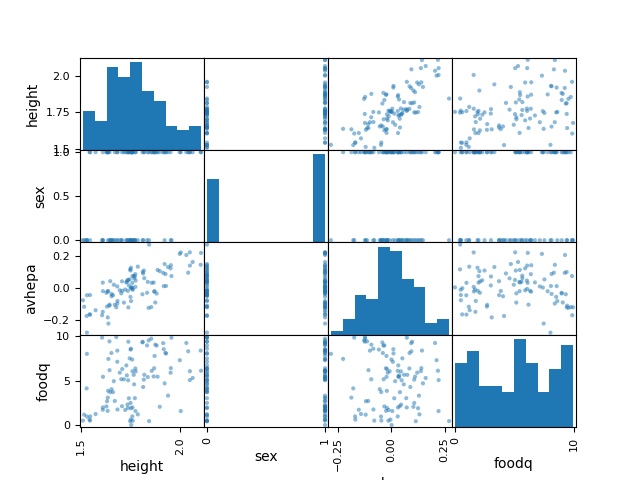

In [56]:
print(df.corr())
pd.plotting.scatter_matrix(df)